In [1]:
library(dplyr)

treesData=read.table(file="arbres-tot.csv", sep=";", header=TRUE)
treesData = treesData[treesData$HAUTEUR..m. != 0,] %>% rename(circonference = CIRCONFERENCE..cm., hauteur = HAUTEUR..m.)
treesData


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,IDBASE,TYPE.EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT.ADRESSE,NUMERO,LIEU...ADRESSE,IDEMPLACEMENT,LIBELLE.FRANCAIS,GENRE,ESPECE,VARIETE.OUCULTIVAR,circonference,hauteur,STADE.DE.DEVELOPPEMENT,REMARQUABLE,geo_point_2d
,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,139255,Arbre,Jardin,PARIS 16E ARRDT,,NA,SQUARE ROGER COQUOIN / 14 AVENUE FERDINAND BUISSON,000102006,Epicéa,Picea,abies,,60,9,Jeune (arbre)Adulte,NON,"6859763.24789,645305.347999"
3,139244,Arbre,Jardin,PARIS 16E ARRDT,,NA,SQUARE ROGER COQUOIN / 14 AVENUE FERDINAND BUISSON,000101025,Epicéa,Picea,abies,,70,10,Jeune (arbre)Adulte,NON,"6859769.8839,645337.503999"
4,2015711,Arbre,Jardin,BOIS DE VINCENNES,,NA,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,00320021,Epicéa,Picea,abies,,105,17,Adulte,NON,"6859673.2219,659205.991999"
5,187466,Arbre,DASCO,PARIS 20E ARRDT,,NA,ECOLE MATERNELLE / 94 RUE COURONNES,084704008,Epicéa,Picea,abies,,90,8,Jeune (arbre)Adulte,NON,"6863517.0009,655067.059999"
6,160479,Arbre,CIMETIERE,SEINE-SAINT-DENIS,,NA,CIMETIERE DE PANTIN / DIV 144,D00000144023,Epicéa,Picea,abies,,30,4,,,"6867548.54989,657446.925999"
8,191107,Arbre,DASCO,PARIS 15E ARRDT,,NA,ECOLE MATERNELLE / 35 AVENUE EMILE ZOLA,070801005,Epicéa,Picea,abies,,50,9,Jeune (arbre),NON,"6860963.95689,647282.543999"
9,160477,Arbre,CIMETIERE,SEINE-SAINT-DENIS,,NA,CIMETIERE DE PANTIN / DIV 25,D00000025010,Epicéa,Picea,abies,,160,15,,,"6867611.09989,656435.042999"
10,2033520,Arbre,DJS,SEINE-SAINT-DENIS,TENNIS,NA,PARC DES SPORTS INTERDEPARTEMENTAL DE BOBIGNY / 40 AVENUE DE LA DIVISION LECLERC - BOBIGNY,000206002,Epicéa,Picea,abies,,20,5,,NON,"6867826.3919,657590.646999"
11,197767,Arbre,DJS,PARIS 12E ARRDT,,NA,CENTRE SPORTIF PAUL VALERY / 15 RUE DE LA NOUVELLE CALEDONIE,00320005,Epicéa,Picea,pungens,,70,10,Jeune (arbre)Adulte,NON,"6859943.9599,656755.693999"


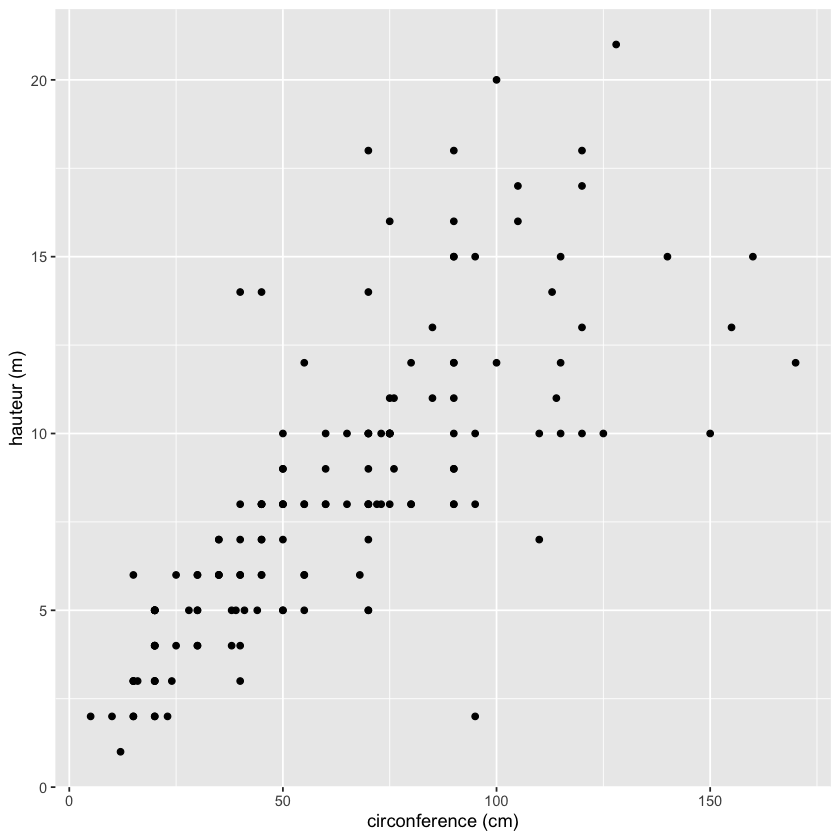

In [2]:
library(ggplot2)

ggplot(data = treesData, aes(x=circonference, y=hauteur)) +
  geom_point() +
  xlab("circonference (cm)") +
  ylab("hauteur (m)")

<span style="color:green"> We notice that there is some sort of correlation between the hauter and the circonference. They both grown in a general direction </span>

In [3]:
simple_regression <- lm(hauteur ~ circonference, data = treesData)
names(simple_regression)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [4]:
anova(simple_regression)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
circonference,1,1509.870,1509.870149,200.1412,2.094636e-29
Residuals,150,1131.604,7.544024,NA,NA


In [5]:
summary(simple_regression)


Call:
lm(formula = hauteur ~ circonference, data = treesData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2461 -1.6036 -0.2519  1.0772  9.0056 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.689630   0.452596   5.943 1.88e-08 ***
circonference 0.090068   0.006366  14.147  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.747 on 150 degrees of freedom
Multiple R-squared:  0.5716,	Adjusted R-squared:  0.5687 
F-statistic: 200.1 on 1 and 150 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


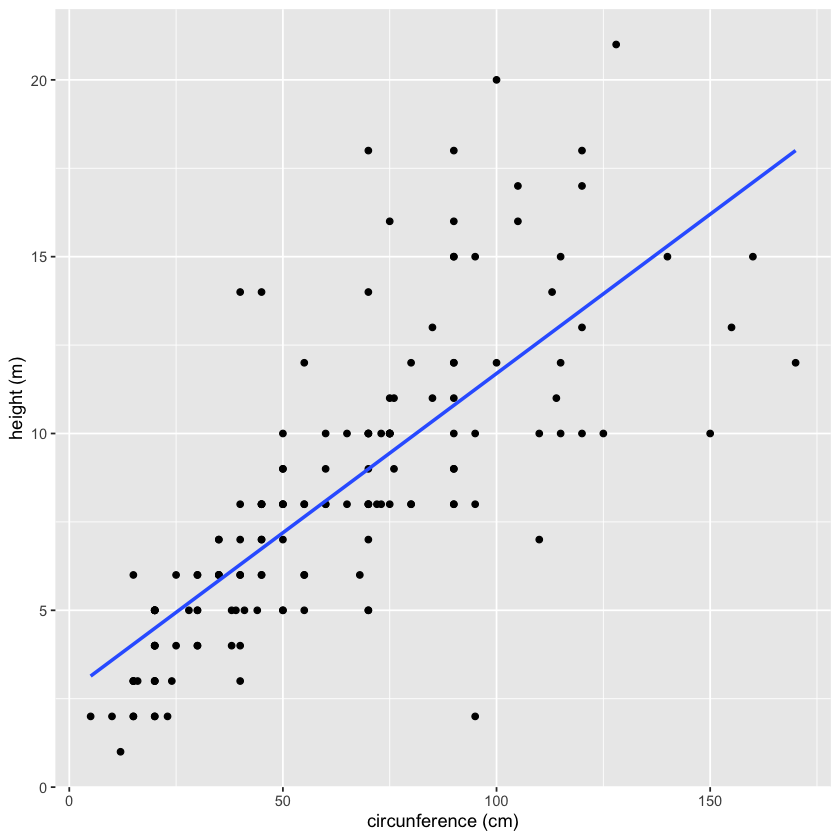

In [6]:
ggplot(treesData, aes(x = circonference, y = hauteur))+
  geom_point()+
  stat_smooth(method = "lm", se = FALSE)+ 
  xlab("circunference (cm)")+
  ylab("height (m)")

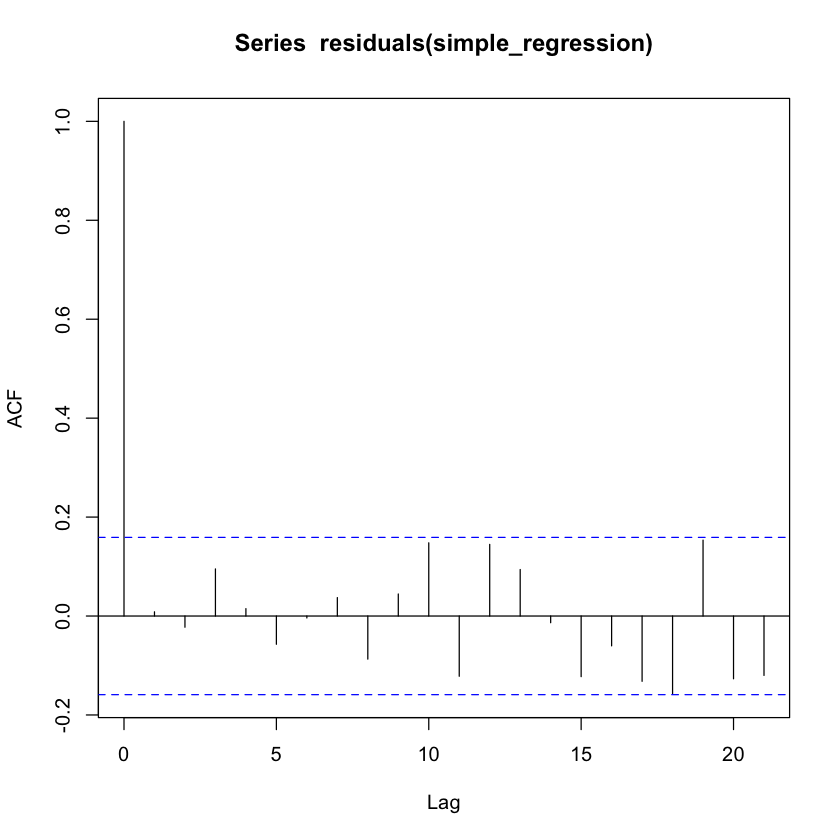

In [7]:
acf(residuals(simple_regression))

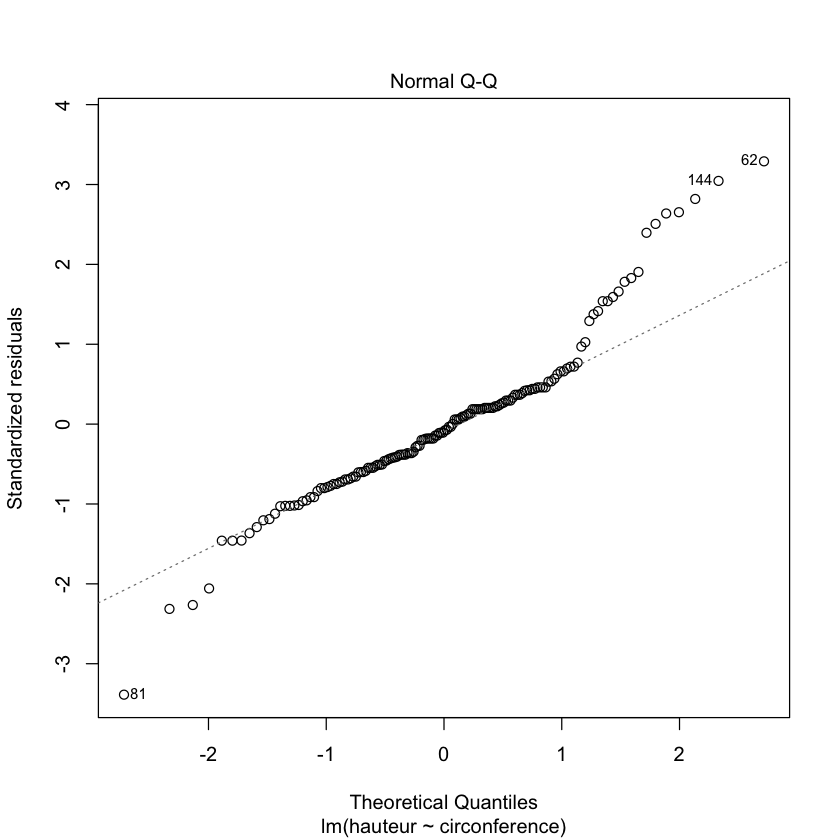

In [8]:
plot(simple_regression,2)

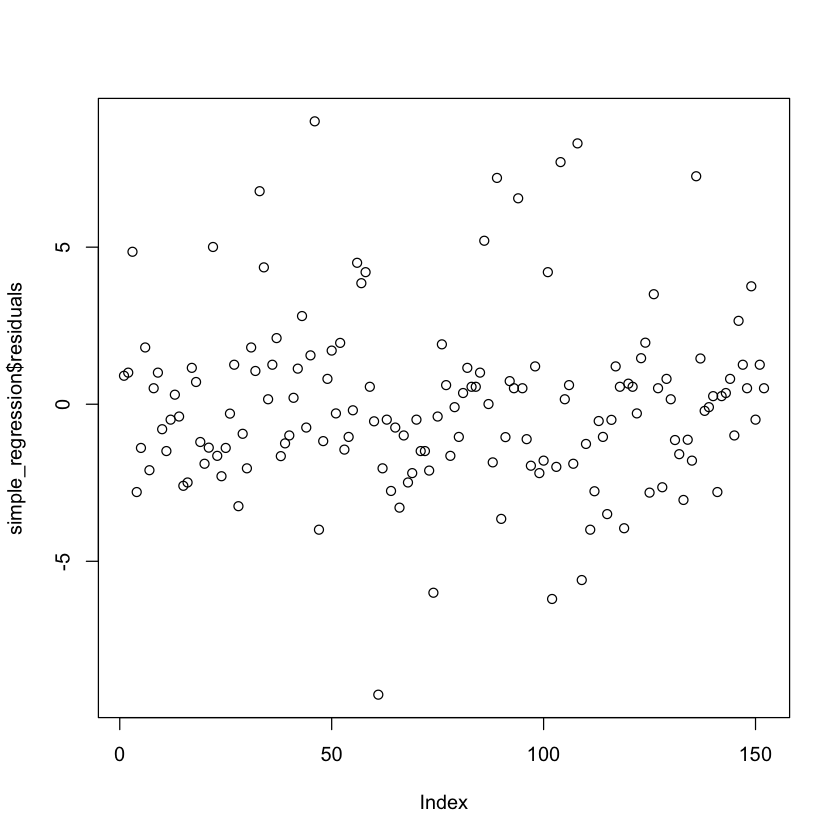

In [9]:
plot(simple_regression$residuals)

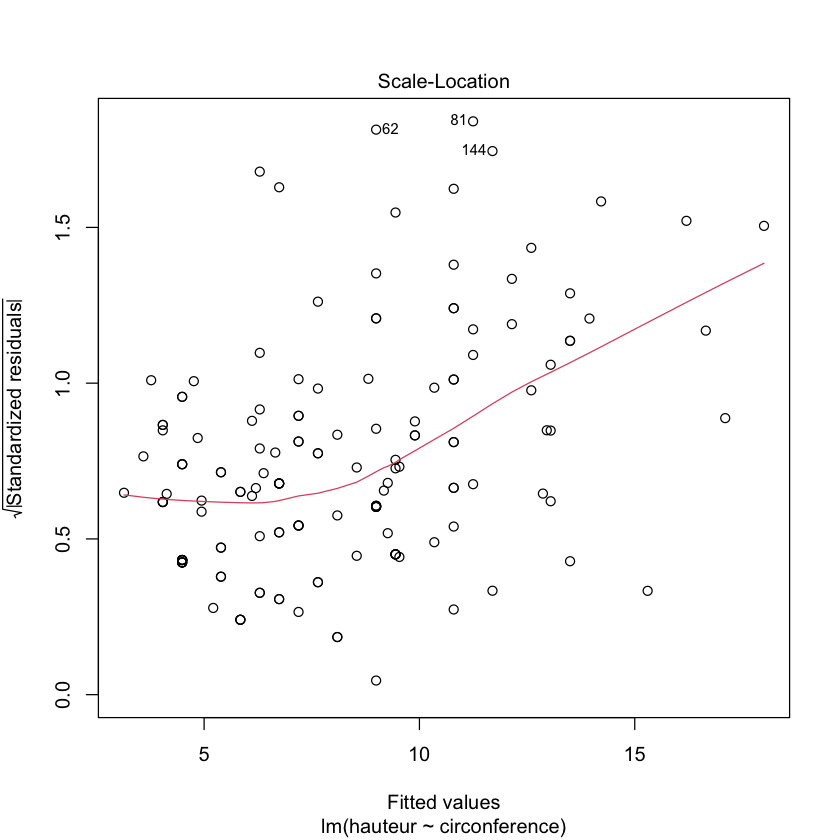

In [10]:
plot(simple_regression,3)

## Multivariate regression

In [11]:
treesData$circ_sqrt <- sqrt(treesData$circonference)

In [12]:
multi_reg <- lm(hauteur ~ circonference + circ_sqrt, data=treesData)
summary(multi_reg)


Call:
lm(formula = hauteur ~ circonference + circ_sqrt, data = treesData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4243 -1.5874 -0.0322  0.9564  8.4126 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -4.00150    2.03146  -1.970 0.050720 .  
circonference -0.03009    0.03615  -0.832 0.406521    
circ_sqrt      1.87597    0.55618   3.373 0.000948 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.656 on 149 degrees of freedom
Multiple R-squared:  0.602,	Adjusted R-squared:  0.5966 
F-statistic: 112.7 on 2 and 149 DF,  p-value: < 2.2e-16


In [13]:
multi_reg_2 <- lm(hauteur ~ circ_sqrt, data = treesData)
summary(multi_reg_2)


Call:
lm(formula = hauteur ~ circ_sqrt, data = treesData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4099 -1.4992 -0.0704  1.0289  8.5497 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.42839    0.74436  -3.262  0.00137 ** 
circ_sqrt    1.41977    0.09462  15.004  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.654 on 150 degrees of freedom
Multiple R-squared:  0.6001,	Adjusted R-squared:  0.5975 
F-statistic: 225.1 on 1 and 150 DF,  p-value: < 2.2e-16


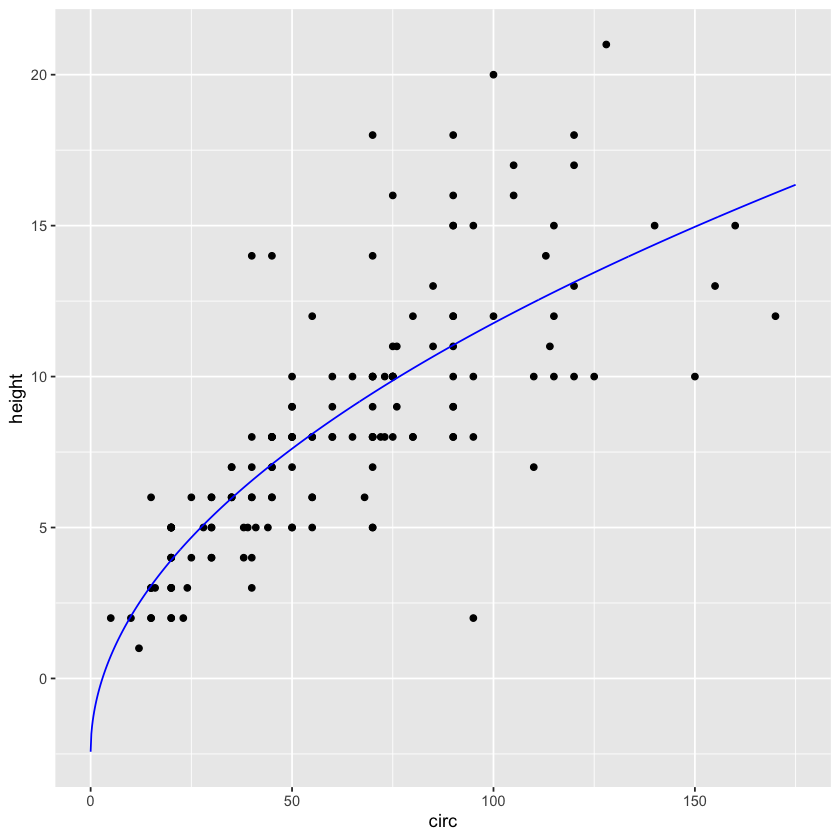

In [14]:
circ_pred <- seq(0,175,len=1000)
height_pred <- multi_reg_2$coefficients[1]+multi_reg_2$coefficients[2]*sqrt(circ_pred)
fct_reg <- data.frame(circ_pred=circ_pred, height_pred=height_pred)
ggplot() +
  geom_point(data=treesData, aes(x=circonference, y=hauteur)) +
  geom_line(data=fct_reg, aes(x=circ_pred, y=height_pred), col="blue") +
  stat_smooth(method="lm", se=FALSE) +
  xlab("circ") +
  ylab("height")